In [26]:
import numpy as np
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

X = data.data
y = data.target

In [27]:
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=1,
                 train_size=0.8,
                 test_size=0.2,
                 random_state=0)
train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [28]:
from sklearn import linear_model
clf = linear_model.LogisticRegression()

In [29]:
clf.fit(X_train, y_train)

/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
clf.score(X_test, y_test)

0.956140350877193

In [31]:
y_test

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1])

In [32]:
np.count_nonzero(y_test==0)

47

In [33]:
len(y_test)

114

In [34]:
y_pred = clf.predict(X_test)

In [35]:
conf_mat = np.zeros([2,2])

for true_label, est_label in zip(y_test, y_pred):
    conf_mat[true_label, est_label] += 1

In [36]:
print(conf_mat)

[[46.  1.]
 [ 4. 63.]]


In [37]:
import pandas as pd
df = pd.DataFrame(conf_mat, columns=["pred 0", "pred 1"],
                 index=["true 0", "true 1"])

In [38]:
df

,pred 0,pred 1
true 0,46.0,1.0
true 1,4.0,63.0


In [39]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [40]:
accuracy_score(y_test, y_pred)

0.956140350877193

In [41]:
cmat = confusion_matrix(y_test, y_pred)
cmat

array([[46,  1],
       [ 4, 63]])

In [42]:
TP = cmat[0,0] #true positive
TP

46

In [43]:
TN = cmat[1,1] #ture nagative
TN

63

In [44]:
FP = cmat[1,0] # false positive
FP

4

In [45]:
FN = cmat[0,1] #false nagative
FN

1

In [46]:
from sklearn.datasets import load_digits
data = load_digits()

X = data.data
y = data.target

In [47]:
img = data.images

In [48]:
X[0].shape, img[0].shape

((64,), (8, 8))

(-0.5, 7.5, 7.5, -0.5)

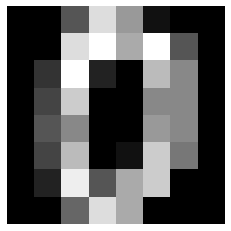

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.gray()
plt.imshow(img[0], interpolation='none')
plt.axis('off')

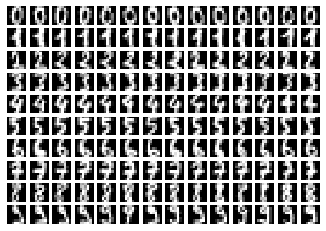

In [50]:
for i in range(10):
    i_th_digit = data.images[data.target == i]
    for j in range(1,15):
        plt.subplot(10,15, i*15 +j +1)
        plt.axis('off')
        plt.imshow(i_th_digit[j], interpolation='none')

In [51]:
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=1, train_size=0.8, test_size=0.2, random_state=0)

train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [52]:
clf.fit(X_train, y_train)

/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
clf.score(X_test, y_test)

0.95

In [54]:
y_pred = clf.predict(X_test)

In [55]:
accuracy_score(y_test, y_pred)

0.95

In [56]:
conf_mat = confusion_matrix(y_test, y_pred)
df = pd.DataFrame(conf_mat,
                 columns=range(0,10),
                 index=range(0,10))

print(df)

    0   1   2   3   4   5   6   7   8   9
0  27   0   0   0   0   0   0   0   0   0
1   0  31   0   0   0   0   1   0   3   0
2   0   0  34   2   0   0   0   0   0   0
3   0   0   0  29   0   0   0   0   0   0
4   0   0   0   0  30   0   0   0   0   0
5   0   0   0   0   0  39   0   0   0   1
6   0   1   0   0   0   0  43   0   0   0
7   0   1   0   0   1   0   0  37   0   0
8   0   2   1   0   0   0   0   0  35   1
9   0   0   0   1   0   1   0   0   2  37


In [57]:
from sklearn.decomposition import PCA
pca = PCA(whiten=True)
pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

/home/ma/.bin/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


TypeError: Invalid shape (64,) for image data

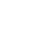

In [59]:
for i in range(10):
    i_th_digit = X_train_pca[y_train == i]
    for j in range(0,15):
        plt.subplot(10,15, i*15 +j +1)
        plt.axis('off')
        plt.imshow(i_th_digit[j], interpolation='none')

In [60]:
X_train_pca.shape

(1437, 64)